In [3]:
# Name: Chandni Sathish Kumar
# Github Username: ChandniSathishKumar
# USC ID: 6700594537, sathishk@usc.edu

1. Decision Trees as Interpretable Models
(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations.

In [97]:
!pip install xgboost

In [1]:
#Importing all the required packages
import os
import csv
import math
import pandas as pd
import numpy as np
from sklearn.utils import resample
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:


file_path = '../data/diagnosis.data'
column_names = ['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']

df = pd.read_csv(file_path, delimiter='\t', header=None, names = column_names, encoding='utf-16',decimal = ",")

df.columns = column_names
df.head()


,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


1. (b) Build a decision tree on the whole data set and plot it.1


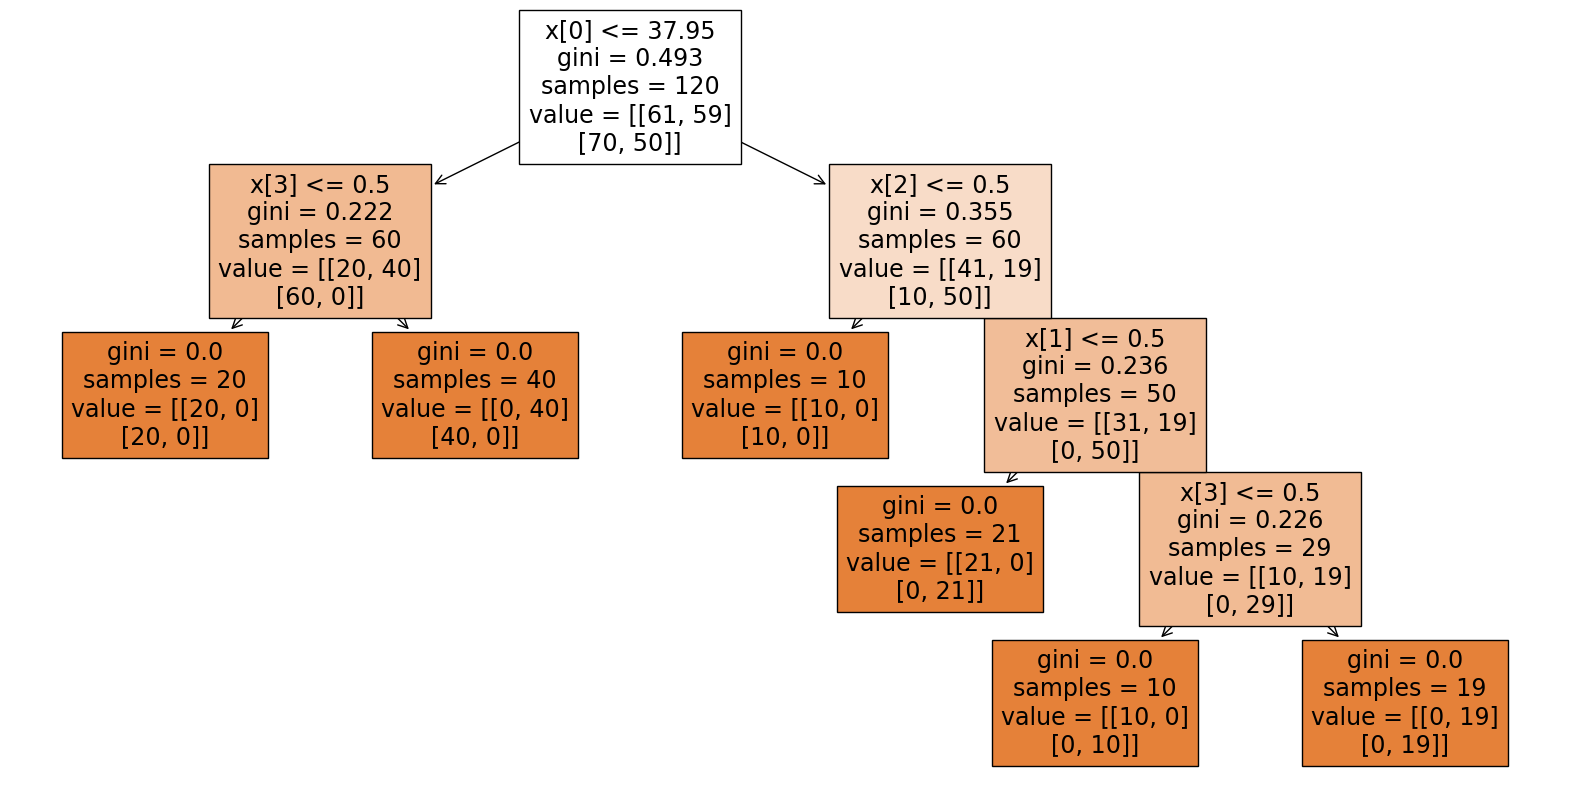

In [3]:
df = df.replace({'yes': 1, 'no': 0})

X = df.drop(['Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'], axis=1)
y = df[['Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']]

# lp = LabelPowerset()
# y_transformed = lp.transform(y)

clf = DecisionTreeClassifier()
clf.fit(X, y)

# clf.fit(X, y_transformed)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True)
plt.show()

In [4]:
# plt.figure(figsize = (24,24))
# tree.plot_tree(DT_model, feature_names = X_df.columns.tolist(), class_names = y_df.columns.tolist())

1. (c) Convert the decision rules into a set of IF-THEN rules.2


In [6]:
clf = DecisionTreeClassifier()
clf.fit(X, y)
def tree_to_code(tree, feature_names):

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

In [7]:
tree_to_code(clf,X.columns)

def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra):
  if Temperature <= 37.95000076293945:
    if Lumbar pain <= 0.5:
      return [[0. 1.]
 [1. 0.]]
    else:  # if Lumbar pain > 0.5
      return [[1. 0.]
 [1. 0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[1. 0.]
 [1. 0.]]
    else:  # if Lumbar pain > 0.5
      if Nausea <= 0.5:
        return [[1. 0.]
 [0. 1.]]
      else:  # if Nausea > 0.5
        if Urine pushing <= 0.5:
          return [[1. 0.]
 [0. 1.]]
        else:  # if Urine pushing > 0.5
          return [[0. 1.]
 [0. 1.]]


1. (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability.


In [8]:

# Get alpha values for pruning
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(ccp_alphas, impurities)
# Cross-validation for alpha selection
decisionTreeModel = DecisionTreeClassifier(random_state = 0)
treeCV = GridSearchCV(decisionTreeModel, cv = 5, param_grid={'ccp_alpha': ccp_alphas[1:]}, scoring='neg_mean_squared_error')
treeCV.fit(X,y)
print("best alpha",treeCV.best_params_['ccp_alpha'])
tree_pruned = DecisionTreeClassifier(ccp_alpha = treeCV.best_params_['ccp_alpha'])
tree_pruned = tree_pruned.fit(X, y)



[0.         0.04908333 0.07947222 0.11111111 0.20423611] [0.         0.09816667 0.17763889 0.28875    0.49298611]
best alpha 0.04908333333333333


The Minimal decision tree with high interpretability:

 if ( Temperature <= 37.95000076293945 ) {
   if ( Urine pushing <= 0.5 ) {
     return [[1. 0.]
 [1. 0.]]
   } else {
     return [[0. 1.]
 [1. 0.]]
   }
 } else {
   if ( Lumbar pain <= 0.5 ) {
     return [[1. 0.]
 [1. 0.]]
   } else {
     return [[0.62 0.38]
 [0.   1.  ]]
   }
 }


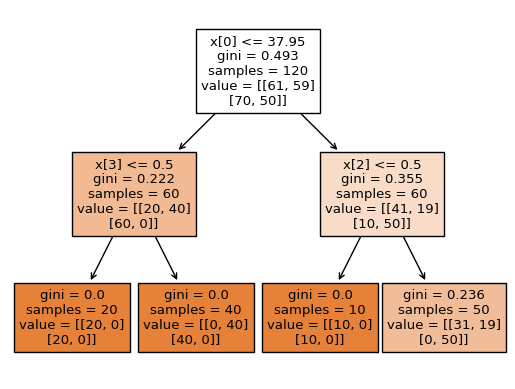

In [9]:
featureNames = X.columns
n_node = tree_pruned.tree_.node_count
left = tree_pruned.tree_.children_left
right = tree_pruned.tree_.children_right
features = [featureNames[i] for i in tree_pruned.tree_.feature]
threshold = tree_pruned.tree_.threshold
value = tree_pruned.tree_.value

print("The Minimal decision tree with high interpretability:\n")

node =0
depth=0
def recurse(left, right, threshold, features, node, depth=0):
    indent = "  " * depth
    if (threshold[node] != -2):
        print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
        if left[node] != -1:
            recurse (left, right, threshold, features, left[node], depth+1)
            print(indent,"} else {")
            if right[node] != -1:
                recurse (left, right, threshold, features, right[node], depth+1)
            print(indent,"}")
    else:
        print(indent,"return " + str(value[node]))
recurse(left, right, threshold, features, 0, 0)

tree.plot_tree(tree_pruned, filled=True)
plt.show()

2. The LASSO and Boosting for Regression
(a) Download the Communities and Crime data3
from https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [10]:
file_path = '../data/communities.data'
column_names = ["state","county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop",]
df = pd.read_csv(file_path, delimiter=',', header=None, names = column_names, encoding='utf-8')
df.head()
# print(len(column_names))

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [11]:
train_data = df.iloc[:1495, :]
test_data = df.iloc[1495:, :]

(b) The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

In [12]:

# Identify non-predictive features based on the dataset description
non_predictive_features = ["state","county","community","communityname","fold"]  # Fill this list with the names of non-predictive features
df = df.drop(columns=non_predictive_features)

# Impute missing values - replace '?' with NaN for imputation
df.replace('?', np.nan, inplace=True)

# Use SimpleImputer to replace missing values with the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns
data_imputed.index = df.index



In [13]:
data_imputed.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


(c) Plot a correlation matrix for the features in the data set.


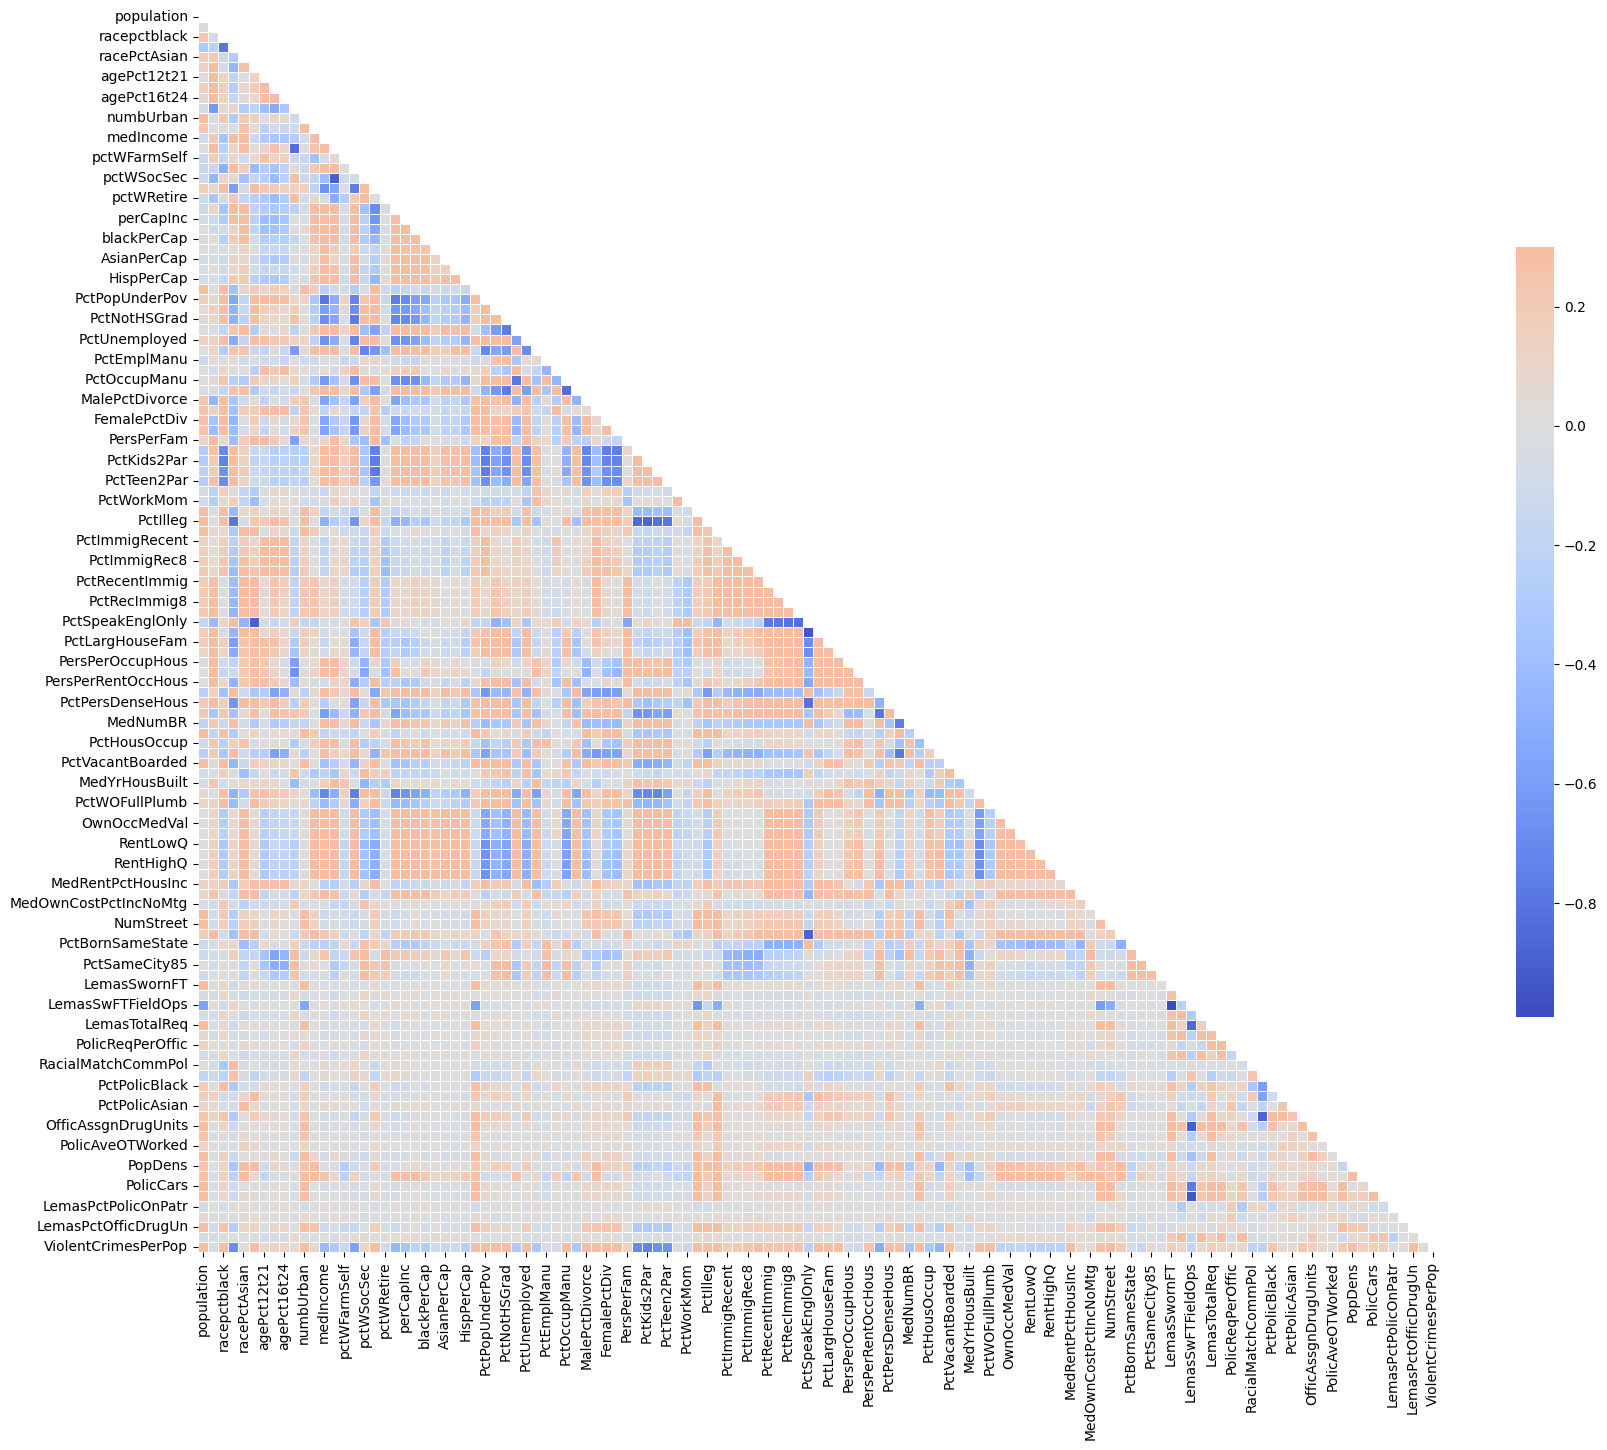

In [14]:
corr = data_imputed.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))  # You can adjust the figure size as needed

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

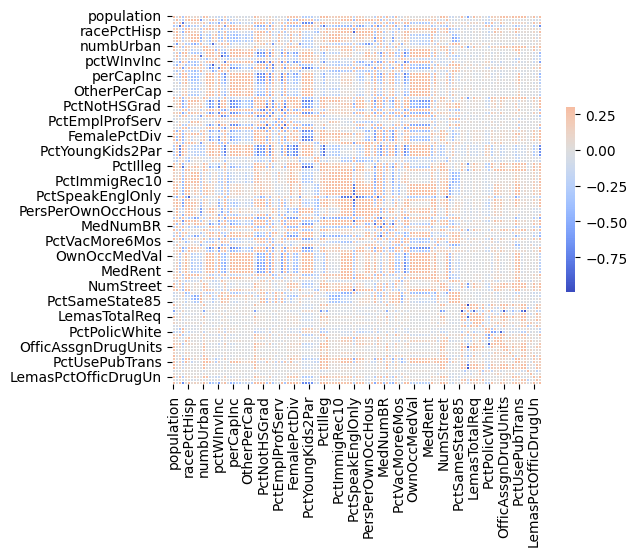

In [15]:
sns.heatmap(corr,  cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

(d) Calculate the Coefficient of Variation CV for each feature, where CV =
s
m
, in
which s is sample standard deviation and m is sample mean..

In [16]:
cv = data_imputed.std() / data_imputed.mean()

print(cv)

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.122331
LemasGangUnitDeploy    0.368040
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.337281
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64


(e) Pick b √
128c features with highest CV , and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

Scattter plot for features with highest CV:


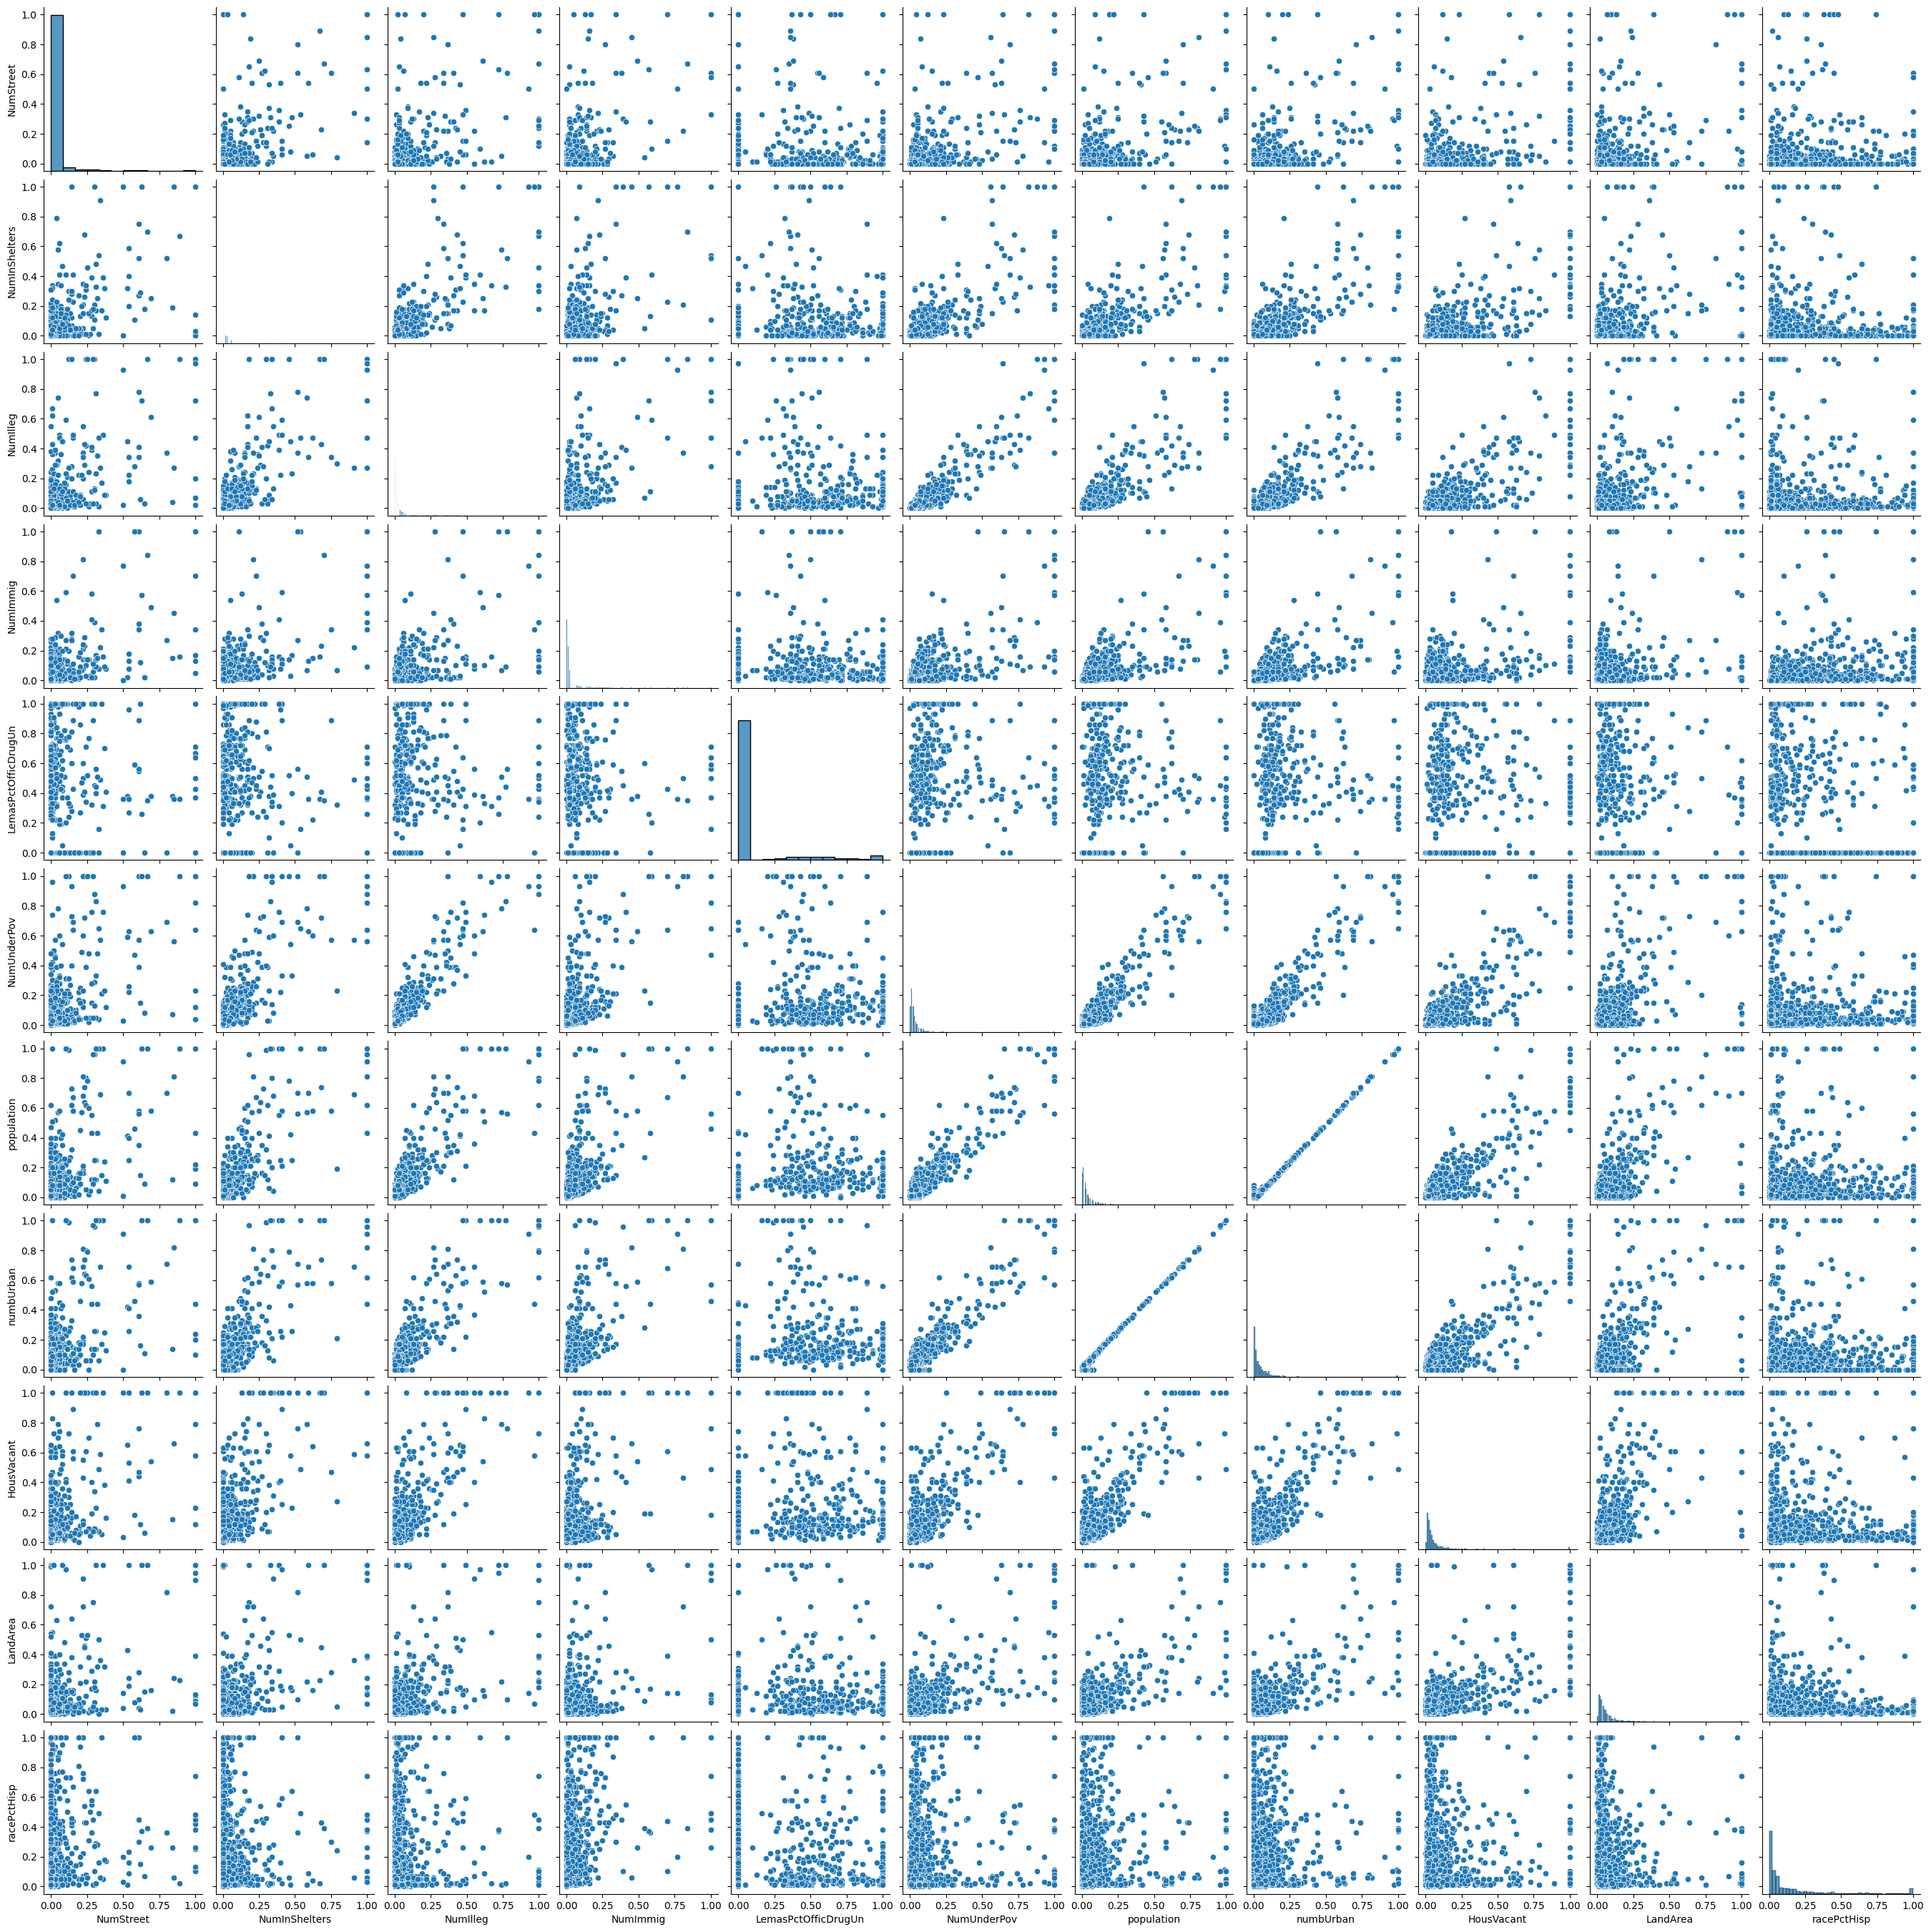

In [17]:

# Assuming 'data_imputed' is the DataFrame containing the dataset with 123 features + target
# Calculate the Coefficient of Variation (CV) for each feature (excluding the target)
features = data_imputed.drop(columns=["ViolentCrimesPerPop"])
cv = features.std() / features.mean()

# Sort features by their CV
sorted_cv = cv.sort_values(ascending=False)

# Select √128 highest CV, which is approximately 11 top features
num_features = int(np.sqrt(128))
top_features = sorted_cv.head(num_features).index.tolist()

sns.pairplot(data_imputed[top_features])
print("Scattter plot for features with highest CV:")
plt.show()


### while scatter plots can provide a good visual indication of relationships, they alone do not establish statistical significance. To draw conclusions about the significance of features, we would typically conduct hypothesis tests, calculate p-values, or evaluate the feature importances produced by a fitted model.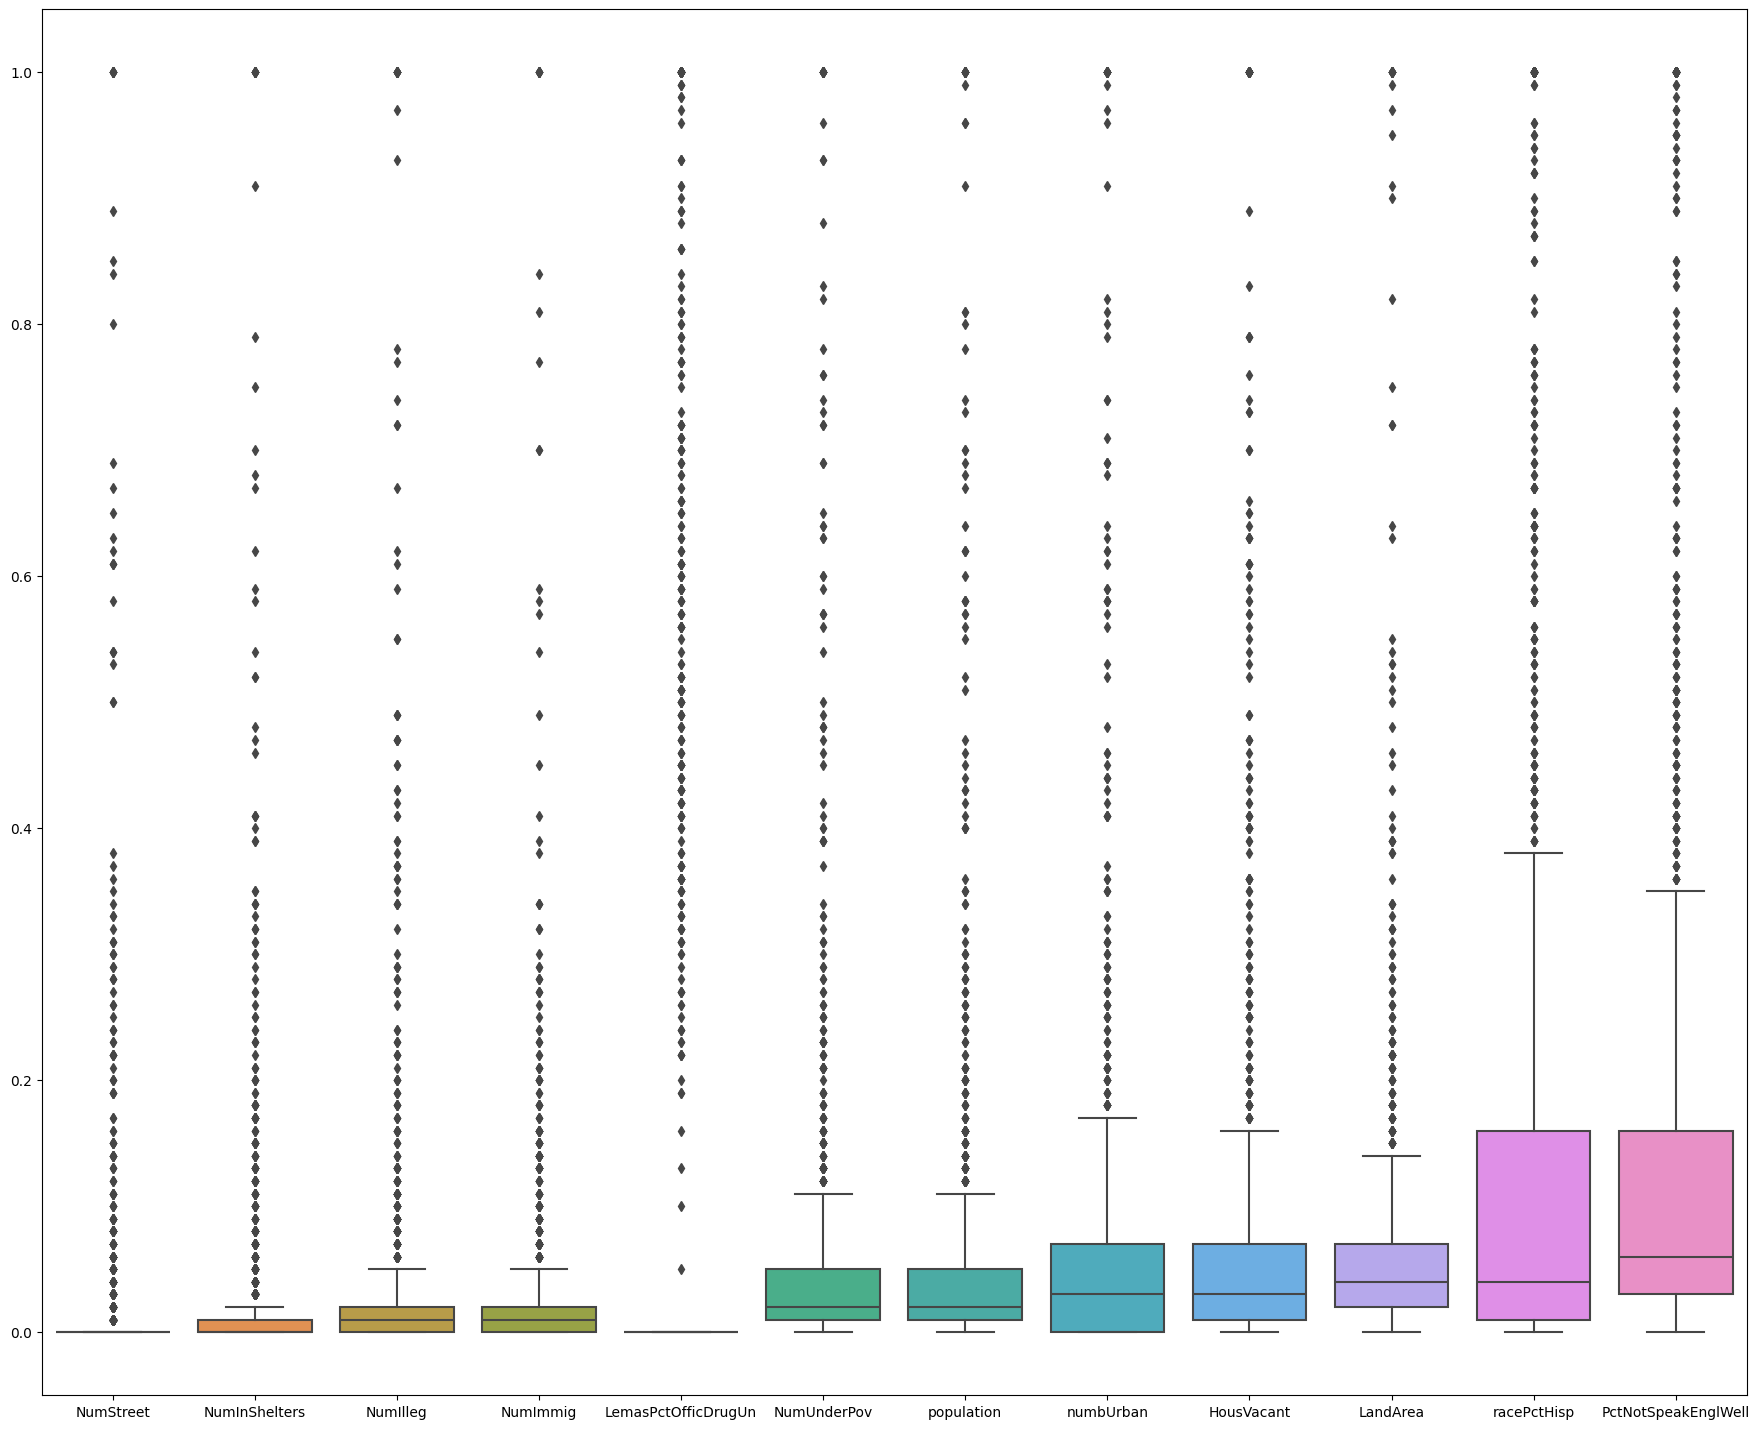

Box plot for features with highest CV:


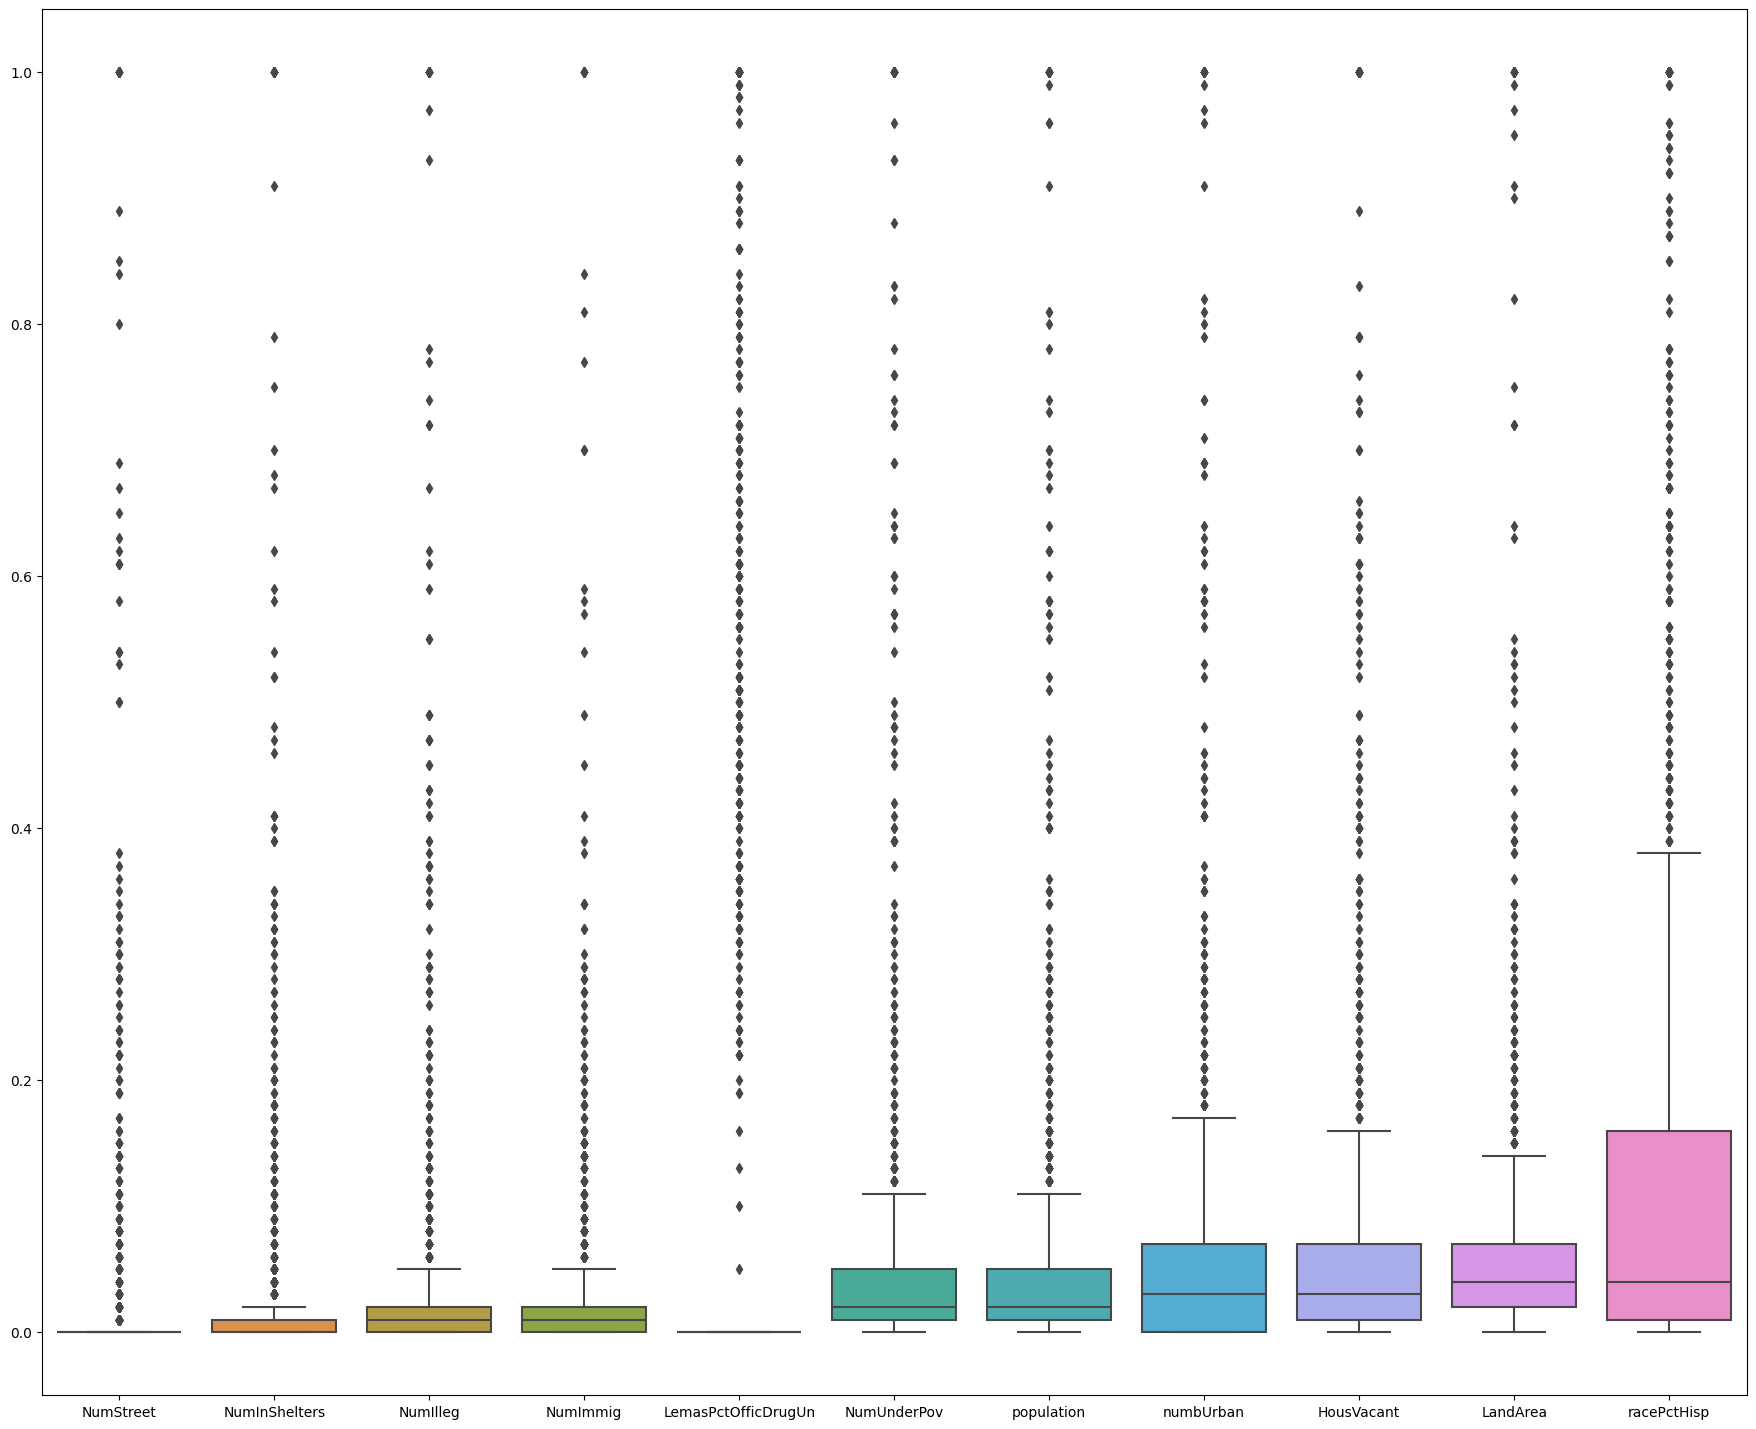

In [18]:
fig, axes = plt.subplots(figsize=(22, 18))
sns.boxplot(data = data_imputed[top_features], ax=axes)
print("Box plot for features with highest CV:")
plt.show()

(f) Fit a linear model using least squares to the training set and report the test error.


In [19]:


# Splitting data into features and target
X = data_imputed.drop(columns=['ViolentCrimesPerPop'])
y = data_imputed['ViolentCrimesPerPop']

# Use the first 1495 rows for training and the rest for testing as specified
X_train, X_test = X[:1495], X[1495:]
y_train, y_test = y[:1495], y[1495:]

# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate and report the test error using MSE
test_error = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {test_error}')


Test MSE: 0.7897255274293091


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained.

In [20]:


lambda_values = np.logspace(-4, 4, 100)

# Fit the Ridge regression model with cross-validation
ridge_cv = RidgeCV(alphas=lambda_values, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_cv.predict(X_test)

# Calculate the test error using Mean Squared Error (MSE)
test_error = mean_squared_error(y_test, y_pred)

print(f"Best lambda chosen by CV: {ridge_cv.alpha_}")
print(f"Test Error (MSE): {test_error}")


Best lambda chosen by CV: 2.310129700083163
Test Error (MSE): 0.017603069934713344


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized4
features. Report the test error for both cases and
compare them.

In [21]:


lambda_values = np.logspace(-4, 4, 100)
lasso_cv = LassoCV(alphas=lambda_values,cv=5, random_state=42)

# Fit LASSO model with original features
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
test_error_original = mean_squared_error(y_test, y_pred)
print(f"Test Error (Original Features): {test_error_original}")

# Report variables selected by the model (non-zero coefficients)
selected_features_original = X_train.columns[(lasso_cv.coef_ != 0)]
# print("Scaled Features Original",selected_features_original)

print(f"Variables selected by the model (Original Features): {list(selected_features_original)}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit LASSO model with standardized features
lasso_cv_scaled = LassoCV(alphas=lambda_values,cv=5, random_state=42)
lasso_cv_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lasso_cv_scaled.predict(X_test_scaled)
test_error_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"Test Error (Standardized Features): {test_error_scaled}")

# Report variables selected by the model (non-zero coefficients)
selected_features_scaled = X_train.columns[(lasso_cv_scaled.coef_ != 0)]
# print("Scaled Features Count",len(selected_features_scaled))
print(f"Variables selected by the model (Standardized Features): {list(selected_features_scaled)}")


Test Error (Original Features): 0.01775229803547754
Variables selected by the model (Original Features): ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg'

### The test error before standardization is 0.01775229803547754 and after standardization is 0.017807206177792106. There is not much difference in the errors, after standardization the error increases by a small value.

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [22]:


# Define a pipeline that standardizes the data, applies PCA, and fits a linear regression
def make_pipeline(n_components):
    return Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('linreg', LinearRegression())
    ])

# Determine the optimal number of components via cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# Test a range of n_components, for example from 1 to min(n_samples, n_features)
n_components_range = range(1, min(X_train.shape) + 1)
for n_components in n_components_range:
    pipeline = make_pipeline(n_components)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# Select the number of components with the highest cross-validation score
optimal_n_components = n_components_range[np.argmax(cv_scores)]

# Fit the final model on the training data
final_pipeline = make_pipeline(optimal_n_components)
final_pipeline.fit(X_train, y_train)

# Predict on the test set and calculate the test error
y_pred = final_pipeline.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

print(f"Optimal number of principal components: {optimal_n_components}")
print(f"Test Error (MSE): {test_error}")


Optimal number of principal components: 45
Test Error (MSE): 0.018252742014937012


(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost5
to fit the model tree. Determine
α (the regularization term) using cross-validation.

In [23]:

alphas = [1e-3, 1e-2, 1e-1, 0.5, 1.0, 5.0, 10.0]
avg_scores = []

kf = 5
data = KFold(kf, shuffle=True, random_state=69)

for alpha in alphas:
    XGB_model = xgb.XGBRegressor(reg_alpha = alpha, random_state = 42)
    score = cross_val_score(XGB_model, X_train, y_train, cv = data, scoring = "neg_mean_squared_error")
    avg_scores.append((alpha, np.abs(score.mean())))

avg_scores.sort(key=lambda x: x[1])
print("Best alpha found using cross-validation is: {}".format(avg_scores[0][0]))
print("The minimum validation MSE using the best alpha found is: {}".format(avg_scores[0][1]))


XGB_model = xgb.XGBRegressor(reg_alpha = 1).fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_test)
XGB_MSE = mean_squared_error(y_test, XGB_pred)

print("XGBoost model test MSE:", XGB_MSE)

Best alpha found using cross-validation is: 5.0
The minimum validation MSE using the best alpha found is: 0.021862222432779792
XGBoost model test MSE: 0.01775752449552266
